## Customer Purchase

Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use("seaborn-v0_8")

df = pd.read_csv("Walmart_customer_purchases.csv")
df.head()


,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


Understanding the purchase amount

In [2]:
df["Purchase_Amount"].describe()

count    50000.000000
mean       255.532230
std        141.574416
min         10.010000
25%        133.050000
50%        255.045000
75%        378.912500
max        499.990000
Name: Purchase_Amount, dtype: float64

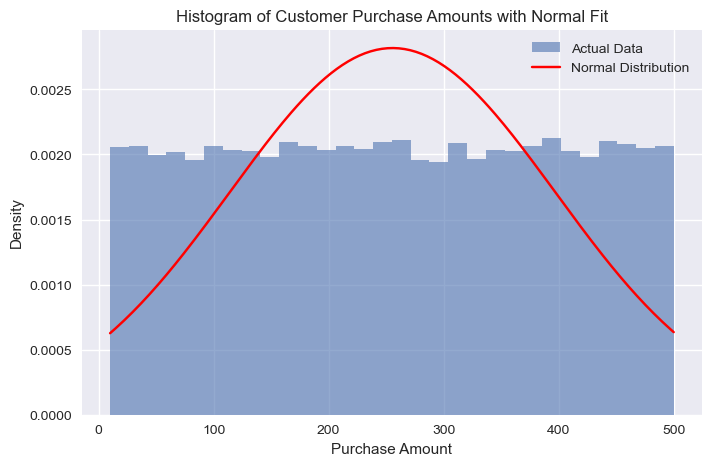

In [3]:
purchase = df["Purchase_Amount"]

mean = purchase.mean()
std = purchase.std()

plt.figure(figsize=(8,5))

# Histogram
plt.hist(purchase, bins=30, density=True, alpha=0.6, label="Actual Data")

# Normal distribution curve
x = np.linspace(purchase.min(), purchase.max(), 200)
plt.plot(x, norm.pdf(x, mean, std), 'r', label="Normal Distribution")

plt.title("Histogram of Customer Purchase Amounts with Normal Fit")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


Probablity of customer buying above threshold

In [4]:
threshold = 300

prob_above_threshold = 1 - norm.cdf(threshold, mean, std)
prob_above_threshold


0.37672456615544136

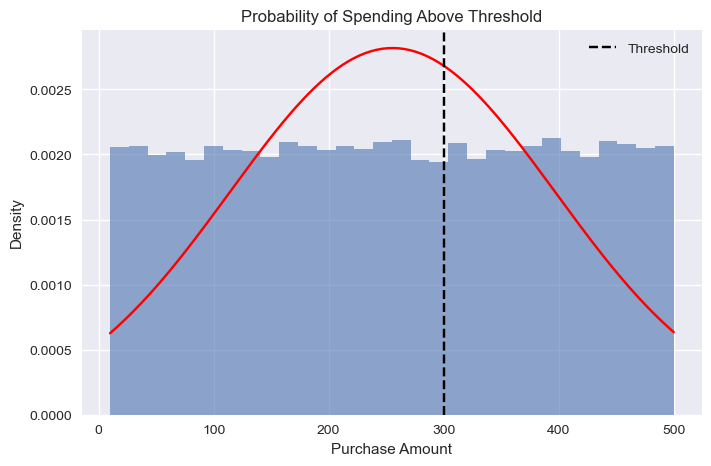

In [5]:
plt.figure(figsize=(8,5))

plt.hist(purchase, bins=30, density=True, alpha=0.6)
plt.plot(x, norm.pdf(x, mean, std), 'r')

plt.axvline(threshold, color='black', linestyle='--', label="Threshold")

plt.title("Probability of Spending Above Threshold")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


Simulate random sales data and compare it with theoretical distribution

In [6]:
np.random.seed(42)

simulated_sales = np.random.normal(
    loc=mean,
    scale=std,
    size=len(purchase)
)


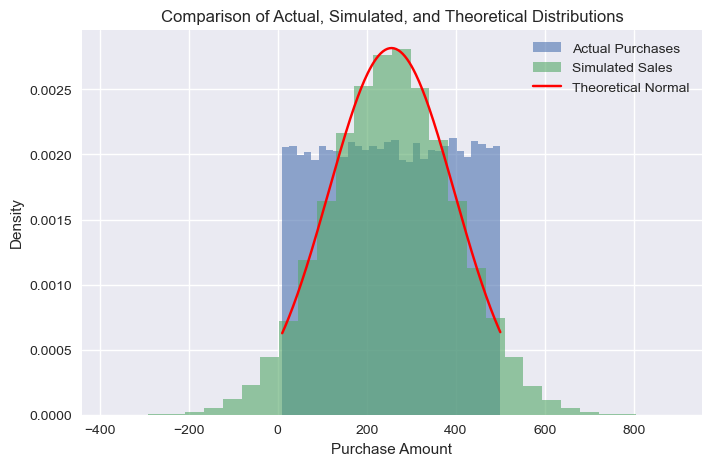

In [7]:
plt.figure(figsize=(8,5))

plt.hist(purchase, bins=30, density=True, alpha=0.6, label="Actual Purchases")
plt.hist(simulated_sales, bins=30, density=True, alpha=0.6, label="Simulated Sales")

plt.plot(x, norm.pdf(x, mean, std), 'r', label="Theoretical Normal")

plt.title("Comparison of Actual, Simulated, and Theoretical Distributions")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()
